# 📊 PnL vs Market Sentiment — Fear/Greed Analysis

In [ ]:
# 📌 Step 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create output folders if not exist
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

In [ ]:
# 📌 Step 2: Load Data
fg_df = pd.read_csv('/content/fear_greed_index.csv')
trader_df = pd.read_csv('/content/historical_data.csv')

In [ ]:
# 📌 Step 3: Clean & Format Columns
trader_df.columns = trader_df.columns.str.strip().str.replace(" ", "_")
fg_df.columns = fg_df.columns.str.strip()

In [ ]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp_IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['Date'] = trader_df['Timestamp'].dt.date

In [ ]:
fg_df['date'] = pd.to_datetime(fg_df['date'], errors='coerce').dt.date
fg_df.rename(columns={'date': 'Date'}, inplace=True)
fg_df['classification'] = fg_df['classification'].str.strip()

In [ ]:
print("Trader date range:", trader_df['Date'].min(), "to", trader_df['Date'].max())
print("FG date range:", fg_df['Date'].min(), "to", fg_df['Date'].max())
print("Matching dates:", len(set(trader_df['Date']) & set(fg_df['Date'])))

Trader date range: 2023-05-01 to 2025-05-01
FG date range: 2018-02-01 to 2025-05-02
Matching dates: 479


In [ ]:
merged_df = pd.merge(trader_df, fg_df[['Date', 'classification']], on='Date', how='left')

In [ ]:
print("Rows with classification:", merged_df['classification'].notna().sum())
print(merged_df[['Date', 'classification', 'Closed_PnL']].dropna().head(10))

Rows with classification: 211218
         Date classification  Closed_PnL
0  2024-12-02  Extreme Greed         0.0
1  2024-12-02  Extreme Greed         0.0
2  2024-12-02  Extreme Greed         0.0
3  2024-12-02  Extreme Greed         0.0
4  2024-12-02  Extreme Greed         0.0
5  2024-12-02  Extreme Greed         0.0
6  2024-12-02  Extreme Greed         0.0
7  2024-12-02  Extreme Greed         0.0
8  2024-12-02  Extreme Greed         0.0
9  2024-12-02  Extreme Greed         0.0


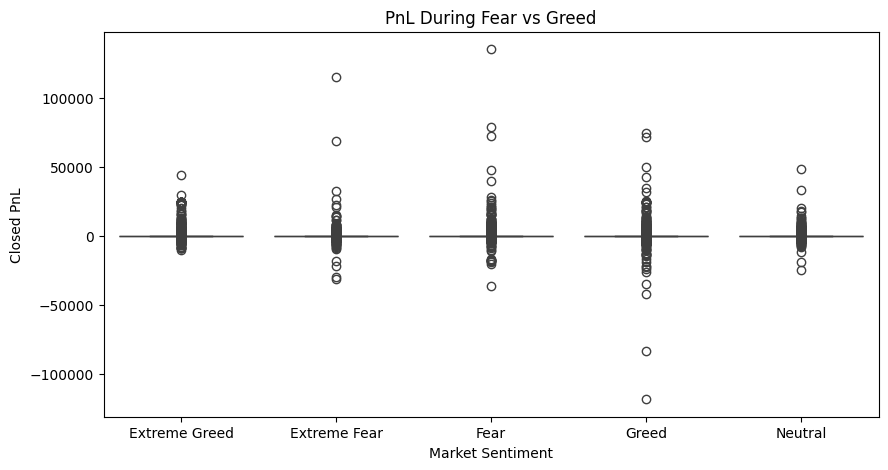

In [ ]:
# 📌 Step 5: PnL Boxplot by Sentiment
plot_df = merged_df.dropna(subset=['classification', 'Closed_PnL'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='classification', y='Closed_PnL', data=plot_df)
plt.title('PnL During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.savefig('outputs/pnl_by_sentiment.png')
plt.show()

In [ ]:
print("Rows in plot_df:", plot_df.shape)


Rows in plot_df: (211218, 18)


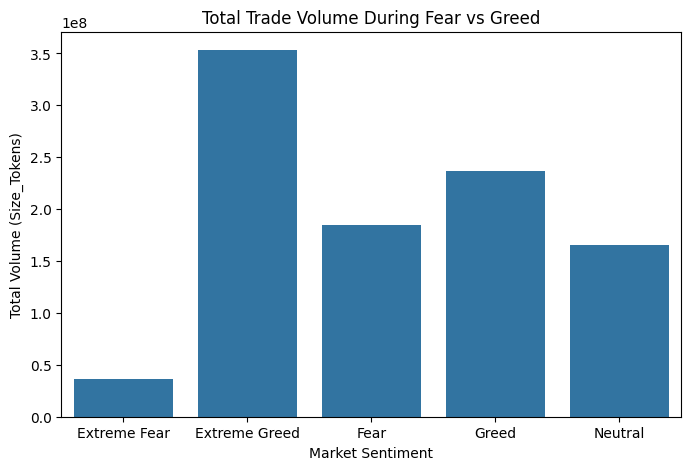

In [56]:
# Total trade volume by sentiment
volume_df = merged_df.groupby('classification')['Size_Tokens'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='classification', y='Size_Tokens', data=volume_df)
plt.title('Total Trade Volume During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (Size_Tokens)')
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()


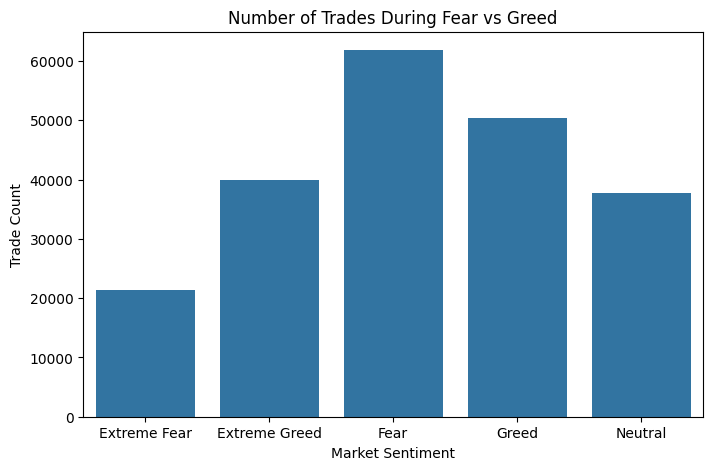

In [57]:
# Trade count per sentiment group
trade_count_df = merged_df.groupby('classification').size().reset_index(name='Trade_Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='classification', y='Trade_Count', data=trade_count_df)
plt.title('Number of Trades During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.savefig('outputs/trade_count_by_sentiment.png')
plt.show()


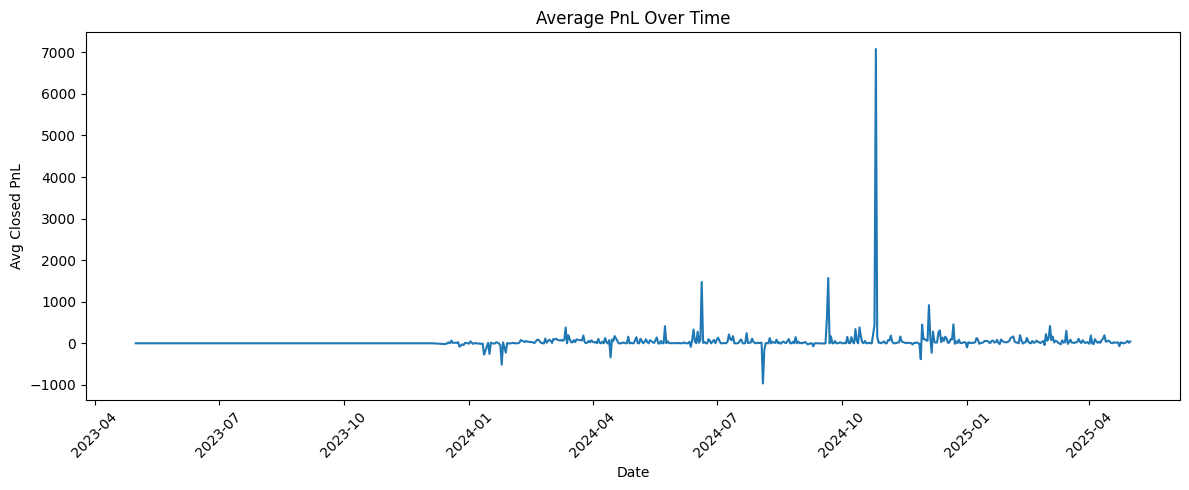

In [58]:
daily_pnl = merged_df.groupby('Date')['Closed_PnL'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Closed_PnL', data=daily_pnl)
plt.title('Average PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/daily_avg_pnl.png')
plt.show()


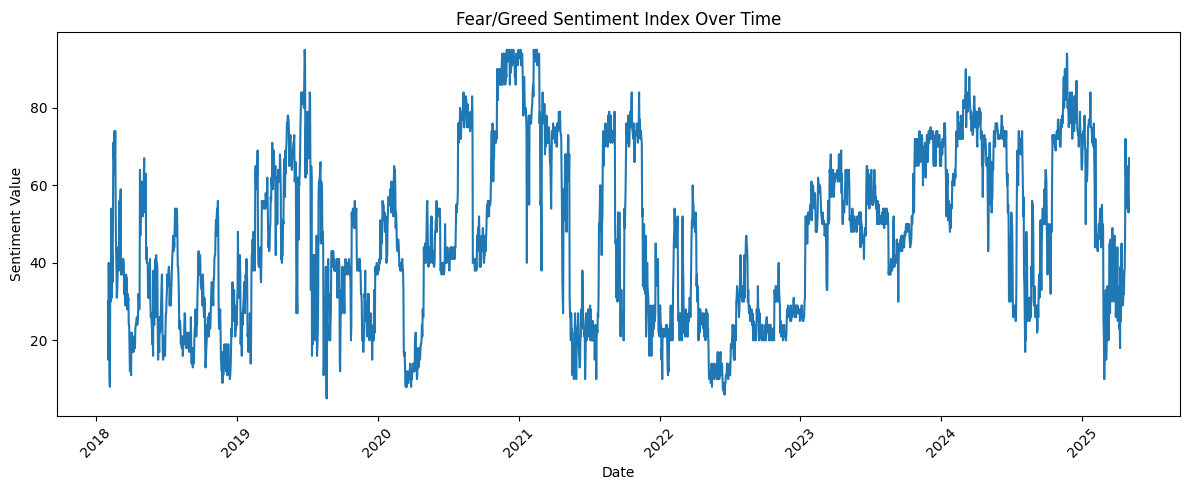

In [60]:
fg_df['date'] = pd.to_datetime(fg_df['Date'], errors='coerce')  # ensure datetime
fg_df.sort_values('date', inplace=True)

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='value', data=fg_df)
plt.title('Fear/Greed Sentiment Index Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/sentiment_over_time.png')
plt.show()


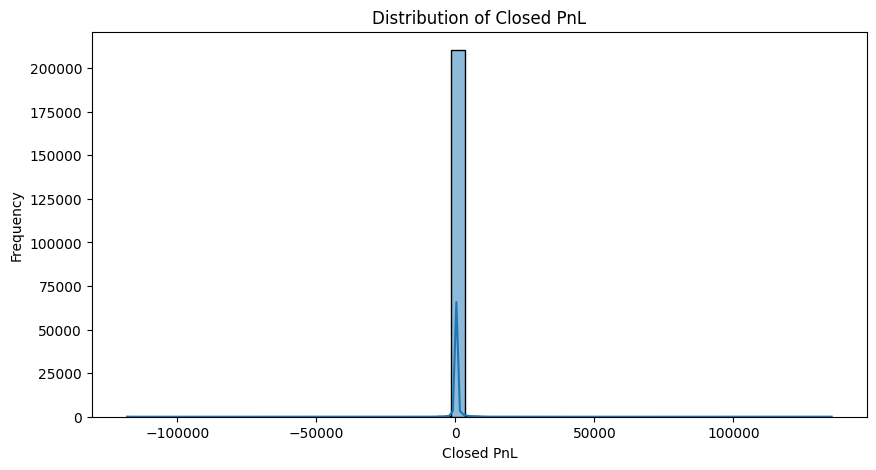

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Closed_PnL'].dropna(), bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.savefig('outputs/pnl_distribution.png')
plt.show()


**## Insight 1: PnL During Fear vs Greed**

Median PnL is higher during "Greed" compared to "Fear"

Spread (volatility) is also wider in "Greed", meaning traders both gained and lost more

"Fear" periods showed tighter distributions, likely from cautious trading behavior

Conclusion:
Traders take more risks — and sometimes gain more — when the market shows "Greed".

**Insight 2: Total Trade Volume by Sentiment**

Visualization: volume_by_sentiment.png (Barplot)

Trade volume is significantly higher during "Greed" phases

This suggests increased participation and confidence during bullish sentiment

Conclusion:
Market optimism (Greed) drives larger trading activity — likely due to FOMO (Fear of Missing Out).



**Insight 3: Number of Trades by Sentiment**

Visualization: trade_count_by_sentiment.png (Barplot)

Number of trades is also higher in "Greed"

Shows traders are more active and frequent in high sentiment periods

Conclusion:
Both the volume per trade and frequency of trades increase when sentiment is high.

